# The Louvain Algorithm for Community Detection

The file *youtube_community_top1000.txt* contains the top 1000 ground-truth communities. For each community scoring function $f$, we rank the ground-truth communities by decreasing score of $f$. So, lower values of rank correspond to the “better” communities by each scoring function, whereas higher values of rank correspond to the “worse” communities under each scoring function. We measure the cumulative running average value of the goodness metric g of the top-$k$ ground-truth communities under the ordering induced by $f$. Intuitively, a perfect community scoring function would rank the communities in decreasing order of the goodness metric, and thus the cumulative running average of the goodness metric would decrease monotonically with $k$.


In [1]:
import networkx as nx
import numpy as np
import pandas as pd
# pip install python-louvain
import community
import matplotlib.pyplot as plt

In [3]:
def read_network(data):
    g = nx.read_edgelist(data, create_using=nx.Graph())
    return g

def read_true_community(data):
    with open(data) as f:
        c = [line.rstrip().split('\t') for line in f]
    return c

def community_modularity(coms, g):
    if type(g) != nx.Graph:
        raise TypeError("Bad graph type, use only non directed graph")
    inc = 0
    deg = 0
    links = g.size()
    if links == 0:
        raise ValueError("A graph without link has an undefined modularity")

    for node in g:
        if node not in coms:
            continue
        for neighbor, dt in g[node].items():
            if neighbor not in coms:
                continue
            if neighbor == node:
                # YOUR CODE HERE
                inc += 0
            else:
                # YOUR CODE HERE
                inc += 1
    
    degs = [G.degree(i) for i in part]
    deg += sum([i*j for i in degs for j in degs])
    m = g.size()

    # YOUR CODE HERE
    Q = inc/(2*m) - deg/(4*m**2)
    return Q

def community_modularity(coms, g):
    if type(g) != nx.Graph:
        raise TypeError("Bad graph type, use only non directed graph")
    inc = 0
    deg = 0
    links = g.size()
    if links == 0:
        raise ValueError("A graph without link has an undefined modularity")
        
    for node in coms:
        deg += g.degree(node)
        for neighbor, dt in g[node].items():
            if neighbor not in coms:
                continue
            if neighbor == node:
                # YOUR CODE HERE
                inc += 0
            else:
                # YOUR CODE HERE
                inc += 1
    
    m = g.size()

    # YOUR CODE HERE
    Q = inc/(2*m) - deg**2/(4*m**2)
    return Q

def modularity(g, coms):
    part = {}
    ids = 0
    for n in coms:
        part[n] = ids
    mod = community_modularity(part, g)
    return mod

def density(coms):
    # YOUR CODE HERE
    ns = len(coms.nodes())
    ms = coms.size()
    den = (2*ms) / (ns*(ns-1))
    return den

def cut_ratio(g, coms):
    ns = len(coms.nodes())
    n_tot = len(g.nodes())
    edges = 0
    for n in coms.nodes():
    	# YOUR CODE HERE
        edges += g.degree(n)
    ms = coms.size()
    cs = edges - 2*ms
    ratio = cs/(ns*(n_tot-ns))
    return ratio

def pquality_summary(graph, partition):
    mods, conds, dens, crs = [], [], [], []
    for cs in partition:
        if len(cs) > 1:
            community = graph.subgraph(cs)
            mods.append(modularity(graph, community))
            dens.append(density(community))
            crs.append(cut_ratio(graph,community))
            #Uncomment the next 4 lines for the sanity check:
            if cs == partition[0]:
               print(mods[-1])
               print(crs[-1])
               print(dens[-1])
    return [mods, crs, dens]

2.1480581525602115e-05
0.00013937984765946497
0.036210317460317464


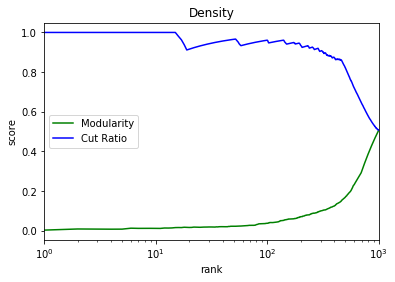

In [4]:
G = read_network('youtube_net.txt')
C = read_true_community("youtube_community_top1000.txt")
len_C = np.array([len(x) for x in C])
partition = C
mods, crs, dens = pquality_summary(G, partition)
mods_sort, den_sort_mods = zip(*sorted(zip(mods, dens), reverse=True))
crs_sort, den_sort_crs = zip(*sorted(zip(crs, dens), reverse=False))
den_sort_mods_avg = [np.mean(den_sort_mods[0:(i+1)]) for i in range(len(den_sort_mods))]
den_sort_crs_avg = [np.mean(den_sort_crs[0:(i+1)]) for i in range(len(den_sort_crs))]
ax = plt.gca()
ax.set_xlim(10**0, 10**3)
ax.set_xscale('log')
ax.plot(np.array([i for i in range(1000)]), np.array(den_sort_mods_avg), color='green', label='Modularity')
ax.plot(np.array([i for i in range(1000)]), np.array(den_sort_crs_avg), color='blue', label='Cut Ratio')
plt.title('Density')
plt.legend()
plt.xlabel('rank')
plt.ylabel('score')
plt.savefig("density.png")